# 機器學習/深度學習相關資料庫讀取

在本課程中將介紹常用的機器學習資料庫

早期在學習機器學習常用的資料庫是   
- [UCI database](https://archive.ics.uci.edu/ml/index.php)，常用的有 [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/Iris) 和[Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine)    

近年慢慢地因為open data和社群平台的發展
很多開源的資料都轉往<br>
- [Kaggle](https://www.kaggle.com/)上來開源


除了這兩個平台之外，在機器學習和深度學習都有套裝的資料庫模組，都有提供簡易資料下載方式，且都可以直接用在後續的分析上，不在需要自行寫前處理來讀取資料<br>

本課程介紹

|連結|
|:-|
|1. 開源結構化數據範例: [scikit-learn](https://scikit-learn.org/stable/)|
|2. Pytorch平台提供的數據範例[torchvision](https://pytorch.org/vision/0.8/datasets.html)|
|3. 私有結構化資料([Iris Dataset](./dataset/iris.cvs))|
|4. 私有非結構化資料([水果資料庫](./dataset/Example_fruit))|

- 1和2 兩個模組的資料庫下載和使用方式<br>
- 3和4兩個私有資料處理方式<br>











## 1. 開源結構化數據範例: [scikit-learn](https://scikit-learn.org/stable/)
在scikit-learn(在python模組簡稱sklearn)有模組[sklearn.datasets.Datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)內建多個資料庫，見下圖。
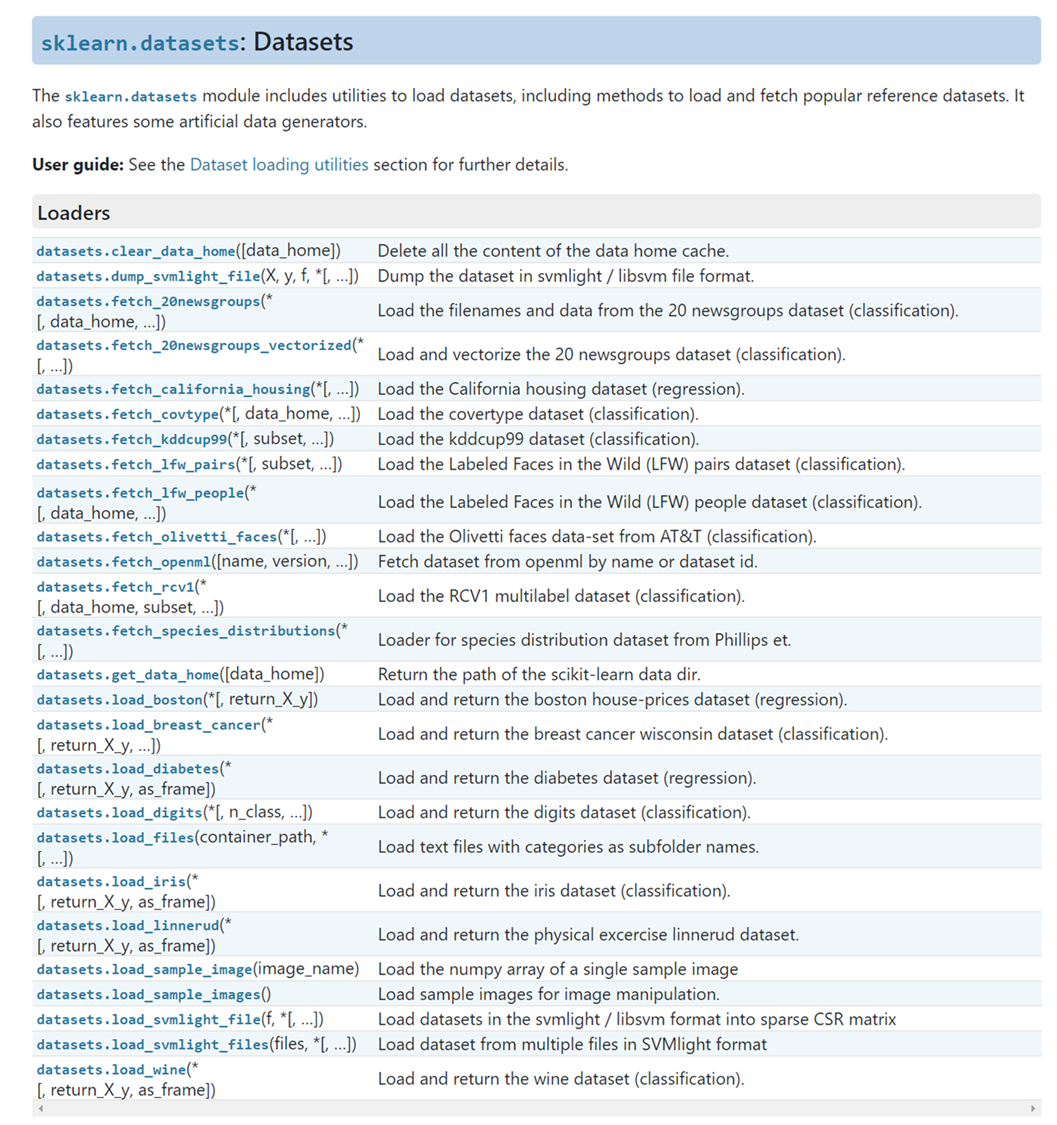


我們將使用WINE資料庫讀取方式實作給讀者看。<br>
[WINE資料集](https://archive.ics.uci.edu/ml/datasets/Wine)其實為UCI資料庫中的一個資料集，因為常被使用也被收錄到sklearn內中。

In [1]:
from sklearn.datasets import load_wine
data_wine = load_wine()
print(data_wine.keys())
print('Number of WINE data: {}.\nDimension:{}.'.format(data_wine.data.shape[0],data_wine.data.shape[1]))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
Number of WINE data: 178.
Dimension:13.


當我們下指令<br>
```
data_wine = load_wine()
```
如果電腦內沒有這筆資料電腦則會自動開始下載資料，如果有則直接從預設位置讀取。<br>

從keys可以看到這個資料集內有什麼東西: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']) <br>

我們可以將data和target的值印出來，並且看到利用shape來看這資料的擺放方式。

In [2]:
print(data_wine.data)
print(data_wine.target)
print('Data dimension:{}'.format(data_wine.data.shape))
print('Target dimension:{}'.format(data_wine.target.shape))

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Data dimension:(178, 13)
Target dimension:(178,)


由上結果可以看到資料是結構化數據維度是
$$ data \in R_{n \times dim} = R_{178 \times 13} $$
$$ Target \in R_{n \times 1} = R_{178 \times 1} $$

我們在分別印出"target_names"、"DESCR"和"feature_names"

In [3]:
print(data_wine.target_names)
print('*'*50)
print(data_wine.feature_names)

['class_0' 'class_1' 'class_2']
**************************************************
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


由上可以知道，target_names就是看到目標的名稱。<br>
feature_names就是看到13個屬性的名稱。<br>
DESCR: 其實是description的簡寫，所以我們如果印出來看得化就會是UCI資料庫上對這個資料集寫的敘述。

In [4]:
print(data_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

<font size=4 color='red'> 如果不想要看整個資料集的class，可以只讀取 data(X) 和 target(Y)</font>

在機器學習教學我們很常用用X表示資料，用Y表示Target會，所以在程式也很容易約定俗成。

只需要在load data內加入「return_X_y=True」即可，如下

In [5]:
from sklearn.datasets import load_wine
X, Y = load_wine(return_X_y=True)
print(X[[0],:]) #印出第一筆資料來看
print(Y[[0]])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]
[0]


## 2. Pytorch平台提供的數據範例[torchvision](https://pytorch.org/vision/0.8/datasets.html)
深度學習發展用到的公開資料庫很多，如果覺得要一個一個去下載和理解太麻煩<br>
pytorch提供了一個非常簡單使用的dataset(torchvision)
pytorch vision: https://pytorch.org/vision/0.8/datasets.html
見下圖。
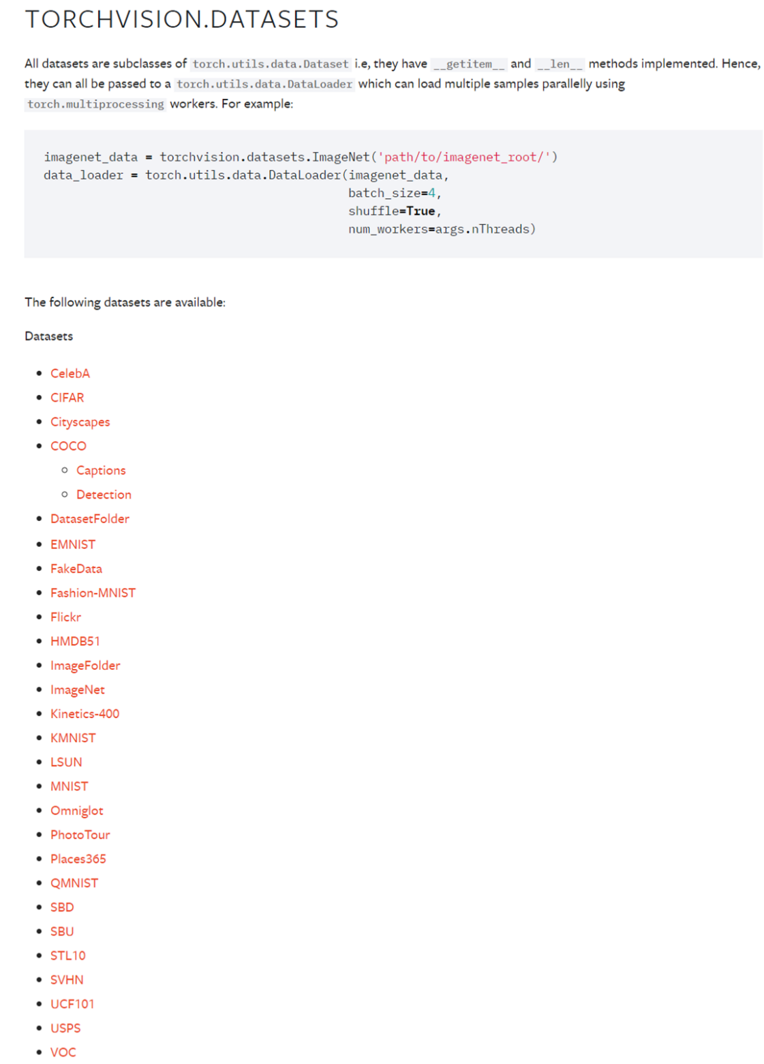

pytorch提供了torchvision模組，但不是資料都已經在你的電腦內了

如果電腦內沒有下載好的資料，可用pytorch的模組同時下載和訓練。

我們將使用MNIST資料庫讀取方式實作給讀者看。<br>

MNIST手寫辨識資料庫是[Yann Lecun](http://yann.lecun.com/exdb/mnist/)開源給大家用的一個資料庫，同時為深度學習課程必備用來授課使用的資料集
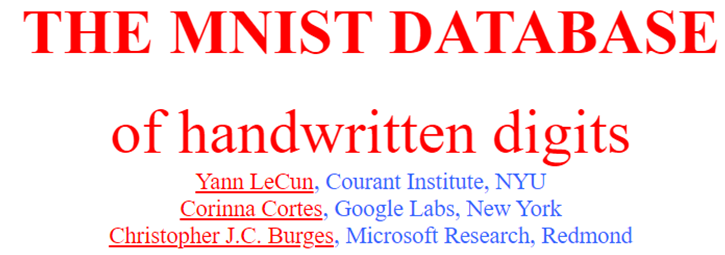

其內容主要目的是要辨識手寫數字的圖片，有(0, 1, 2, 3, 4, 5, 6, 7, 8 ,9)共十類，每張圖片長寬為28$\times$28<br>

|類別|
|:-:|
|0, 1, 2, 3, 4, 5, 6, 7, 8 ,9|

訓練資料(Training set)有60,000 張圖<br>
測試資料(Test set)有10,000 張圖<br>

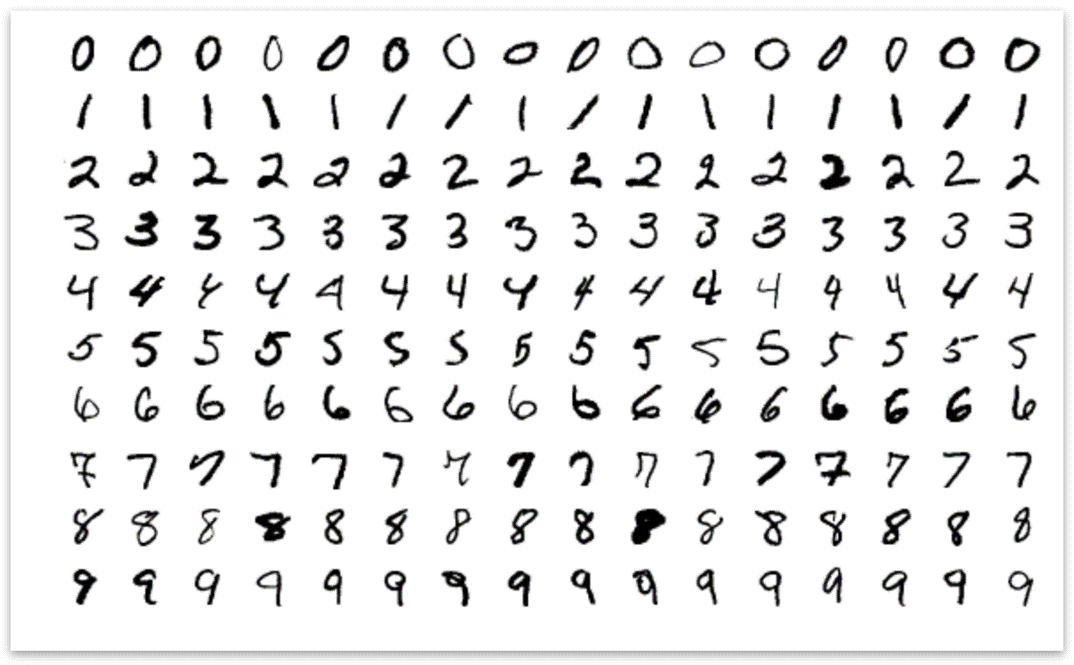

這個資料也有收錄到[Kaggle]內(https://www.kaggle.com/c/digit-recognizer)

In [6]:
import torchvision 
dataset_train_MNIST = torchvision.datasets.MNIST('./dataset', train=True, download=True)
dataset_test_MNIST = torchvision.datasets.MNIST('./dataset', train=False, download=True)

C:\Users\user\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


```
dataset = torchvision.datasets.MNIST(資料路徑, train=True/False, download=True)
```
第一個位置: 資料存放的路徑(程式會從此路徑判斷有沒有資料)<br>
第二個位置: train=True/False，True代表讀訓練資料60000筆。False代表讀訓練測試資料10000筆。<br>
第三個位置: download=True，True代表如果第一個位置沒有資料則會開始下載資料，如果路徑有資料則不會在下載一次。<br>

In [7]:
print(dataset_train_MNIST)
print(dataset_test_MNIST)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./dataset
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test


在pytorh訓練我們通常只要data和target來用即可。<br>
也可以利用看dataset_train_MNIST.classes來看Target的數字表示的類別。<br>

In [8]:
print('Target數字對應的類別:\n{}'.format(dataset_train_MNIST.classes))


Target數字對應的類別:
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [9]:
print('Data dim大小:\n \t{}'.format(dataset_train_MNIST.data.shape))
print('Target dim大小:\n \t{}'.format(dataset_train_MNIST.targets.shape))

Data dim大小:
 	torch.Size([60000, 28, 28])
Target dim大小:
 	torch.Size([60000])


從上面可以得知，圖片大小為 28 $\times$ 28 有60000張。

<font size=5 color='blue'>Pytorch的圖片擺放方式通常為(Batch, Channel, Height, Width)<br></font>
Batch: 圖片有多少張。<br>
Channel:圖片維度數是多少，如果為灰階則是1，彩色(RGB)圖則為3。<br>
Height:圖片高度。<br>
Width: 圖片寬度。<br>
因為MNIST是灰階圖片，所以channel為1，因此讀資料可以直接忽略這個維度數，但如果是用卷積神經網路來訓練要記得把Dimension 從3個 Extension到4個。
指令為
```
torch.unsqueeze(指定維度位置)
```
如果要將tensor從[60000,28,28]變成[60000,1,28,28]，只需要將此tensor進行
```
torch.unsqueeze(axis=1)
```

In [10]:
print('Data dim大小:\n \t{}'.format(dataset_train_MNIST.data.unsqueeze(axis=1).shape))

Data dim大小:
 	torch.Size([60000, 1, 28, 28])


觀察訓練資料每個類別的數量。

In [11]:
import torch 
c=0
for i in range(10):
    c+=len(torch.where(dataset_train_MNIST.targets==i)[0])
    print('number of training data for label {}: {}'.format(i,
                                                    len(torch.where(dataset_train_MNIST.targets==i)[0]))
          )
print('Number of training data:{}'.format(c))


c=0
for i in range(10):
    c+=len(torch.where(dataset_test_MNIST.targets==i)[0])
    print('number of tset data for label {}: {}'.format(i,
                                                    len(torch.where(dataset_test_MNIST.targets==i)[0]))
          )
print('Number of test data:{}'.format(c))

number of training data for label 0: 5923
number of training data for label 1: 6742
number of training data for label 2: 5958
number of training data for label 3: 6131
number of training data for label 4: 5842
number of training data for label 5: 5421
number of training data for label 6: 5918
number of training data for label 7: 6265
number of training data for label 8: 5851
number of training data for label 9: 5949
Number of training data:60000
number of tset data for label 0: 980
number of tset data for label 1: 1135
number of tset data for label 2: 1032
number of tset data for label 3: 1010
number of tset data for label 4: 982
number of tset data for label 5: 892
number of tset data for label 6: 958
number of tset data for label 7: 1028
number of tset data for label 8: 974
number of tset data for label 9: 1009
Number of test data:10000


我們利用matplotlib來看看dataset_train_MNIST.data取出來的資料，我們畫出10張來看看，並將對應的類別名稱也顯示在圖上。

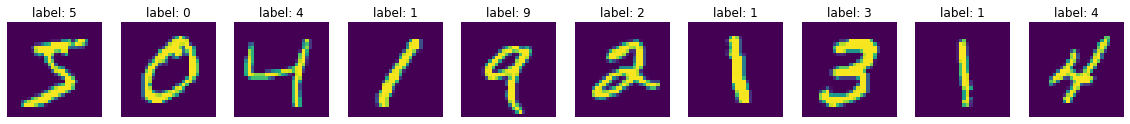

In [12]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, label in zip(axes, dataset_train_MNIST.data, dataset_train_MNIST.targets):
    ax.set_axis_off()
    ax.imshow(image)
    ax.set_title('label: %i' % label)

## 3. 私有結構化資料([Iris Dataset](./dataset/iris.cvs))

><font color = black size=4>當資料為結構資料，有很多種儲存格式，例如txt, xml, json, pickle, csv,...等，但不論是什麼格式只要能讀進電腦整理成最終要進行模型訓練的型態即可。</font>


<br><font color = black size=4>在今天課程，我們使用IRIS data當作私有資料範例，這邊我已經將iris.data改成csv資料格式(iris.csv)</font><br/>
<font color = black size=4>iris.csv存放路徑為: [/dataset/iris.csv](./dataset/iris.csv)，我們用excel將檔案打開如下：</font>

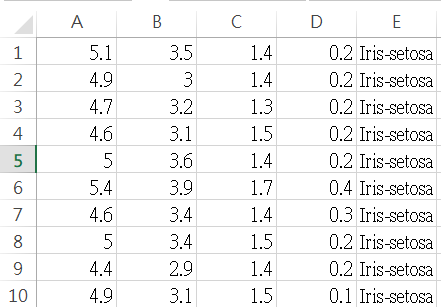

<br><font color = black size=4>這邊我們使用numpy模組將csv讀到電腦內，但實際上不一定要用numpy，用你覺得方便的方法即可。</font><br/>
<br><font color = black size=4>因為此csv內有文字格式，所以我們用str方式進行存取</font><br/>






In [13]:
import numpy as np
csv_iris_filepath = './dataset/iris.csv'
csvdata_iris = np.loadtxt(csv_iris_filepath,dtype=np.str_, delimiter=',')
# print幾筆資料出來看
print(csvdata_iris[0:150:20,:])

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.4' '1.7' '0.2' 'Iris-setosa']
 ['5.0' '3.5' '1.3' '0.3' 'Iris-setosa']
 ['5.0' '2.0' '3.5' '1.0' 'Iris-versicolor']
 ['5.5' '2.4' '3.8' '1.1' 'Iris-versicolor']
 ['6.3' '3.3' '6.0' '2.5' 'Iris-virginica']
 ['6.9' '3.2' '5.7' '2.3' 'Iris-virginica']
 ['6.7' '3.1' '5.6' '2.4' 'Iris-virginica']]


<font color = black size=4>我們將文字的nump array轉換成float格式，且將類別歸屬轉換成量化數字</font>
><font color = blue size=3>Iris-setosa為類別0<br/>
<font color = blue size=3>Iris-versicolor為類別1<br/>
<font color = blue size=3>Iris-virginica為類別2<br/>


In [14]:
label_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
x_iris=[]
y =[]
for line in csvdata_iris:
    tmp_data = []
    for tmp in line:
        if tmp in label_names:
            if tmp == 'Iris-setosa':
                y.append(0)
            elif tmp == 'Iris-versicolor':
                y.append(1)
            elif tmp == 'Iris-virginica':
                y.append(2)
        else:
            tmp_data.append(np.float64(tmp))
    x_iris.append(tmp_data)

x_iris = np.array(x_iris)
y = np.array(y)
print(x_iris[0:150:20,:])
print(y[0:150:15])

[[5.1 3.5 1.4 0.2]
 [5.4 3.4 1.7 0.2]
 [5.  3.5 1.3 0.3]
 [5.  2.  3.5 1. ]
 [5.5 2.4 3.8 1.1]
 [6.3 3.3 6.  2.5]
 [6.9 3.2 5.7 2.3]
 [6.7 3.1 5.6 2.4]]
[0 0 0 0 1 1 1 2 2 2]


整理成numpy array後，看需不需要在儲存成numpy格式、json格式或是pickle格式，讓之後要訓練模型的時候可以省去這樣的步驟。但如果覺得這樣的處理很快不需要再額外存取就每一次訓練都執行一次這樣的前處理。<br>
><font color = red size=3> 建議額外儲存，因為當你的資料有一萬筆，這時候前處理真的很花時間</font><br>

我們這邊用numpy做為資料儲存，如下<br>

In [15]:
np.save("./dataset/iris_x.npy", x_iris)
np.save("./dataset/iris_y.npy", y)
x = np.load( "./dataset/iris_x.npy" )
y = np.load( "./dataset/iris_y.npy" )
print(x[0:150:20,:])
print(y[0:150:20])

[[5.1 3.5 1.4 0.2]
 [5.4 3.4 1.7 0.2]
 [5.  3.5 1.3 0.3]
 [5.  2.  3.5 1. ]
 [5.5 2.4 3.8 1.1]
 [6.3 3.3 6.  2.5]
 [6.9 3.2 5.7 2.3]
 [6.7 3.1 5.6 2.4]]
[0 0 0 1 1 2 2 2]


## 4. 私有非結構化資料([水果資料庫](./dataset/Example_fruit))

<br>當資料為非結構資料(圖像)<br/>

>當資料為自有且非結構資料的時候，通常我們不會一次將資料全部都讀到記憶體內，因為你的資料可能有幾萬張圖片或是幾百萬張，例如ImageNet這樣的資料庫<br/>
<br>所以我們通常只會處理資料的路徑，將所有圖片的路徑檔案都寫入一個你方便讀取的格式，之後在pytorch內我們只需要在pytorch模組database內的init中將這個格式讀取出來就好。
所以此部分我們只簡單介紹一般我們怎麼對這些資料做處理<br/>

<br><font color = black size=3>此範例我們用kaggle內別人整理的圖像Fruits 360</font><br/>
Fruits 360 dataset link: :https://www.kaggle.com/datasets/moltean/fruits
但為了簡化，我們將圖片減少數量，可以在我的[github Link](./dataset/Example_fruit)上下載<br>

裡面我已經分好Train和Test<br>

Train和Test裡面都有Apple、Banana和Watermelon三個資料夾<br>

|資料夾|內容|
|:-|:-|
|Train|Apple|
|Train|Banana|
|Train|Watermelon|
|Test|Apple|
|Test|Banana|
|Test|Watermelon|

<font color = black size=3>將圖片路徑和圖片對應的類別儲存成JSON檔</font>

In [16]:
import os
import numpy as np
import json
imagepaths, labels=[],[]
for dirname, _, filenames in os.walk('./dataset/Example_fruit/Train'):
    if len(filenames)!=0:
        dirname_label = os.path.split(dirname)[-1]
        if dirname_label in 'Apple':
            label = 0
        elif dirname_label in 'Banana':
            label = 1
        elif dirname_label in 'Watermelon':
            label = 2
        print('{} : {}'.format(dirname, label))
        for filename in filenames:
            imagepaths.append(os.path.join(dirname, filename))
            labels.append(label)
data={}
data['imagepaths']=imagepaths
data['labels']=labels
with open('./dataset/Example_fruit/fruit_train.json', 'w', newline='') as jsonfile:
    json.dump(data, jsonfile)
    

./dataset/Example_fruit/Train\Apple : 0
./dataset/Example_fruit/Train\Banana : 1
./dataset/Example_fruit/Train\Watermelon : 2


<font color = black size=3>讀取JSON檔案</font>

In [17]:
with open('./dataset/Example_fruit/fruit_train.json') as jsonfile:
    data_load = json.load(jsonfile)
for imagepath,label in zip(data_load['imagepaths'],data_load['labels']):
    print("filepath:{}, label: {}".format(imagepath,label))

filepath:./dataset/Example_fruit/Train\Apple\0_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\100_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\101_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\102_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\138_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\139_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\15_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\16_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\17_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\18_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\1_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\224_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\225_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\226_100.jpg, label: 0
filepath:./dataset/Example_fruit/Train\Apple\244_100.jpg, label: 0
fil

本系列教學都可以從我的[GitHub](https://github.com/TommyHuang821/PytorchTutorial)來看對應的內容及範例程式！


## 作者 Author
![image](https://user-images.githubusercontent.com/25295252/204134360-67946cc4-e3fe-4c73-a994-b84e5e4098af.png)
<span> - &copy; 黃志勝 Chih-Sheng (Tommy) Huang (<a href="https://github.com/TommyHuang821">Github</a>) (<a href="https://sites.google.com/site/chihshenghuang821">個人網頁</a>) (<a href="https://medium.com/@chih-sheng-huang821">Medium文章</a>) </span>  

## Pytorch Tutorial 實作課程系列文章
## 目錄 
  * [Class 0: 數據型態簡介<br>](https://github.com/TommyHuang821/PytorchTutorial#class-0-%E6%95%B8%E6%93%9A%E5%9E%8B%E6%85%8B%E7%B0%A1%E4%BB%8B)
  * [Class 1: 資料庫取得 <br>](https://github.com/TommyHuang821/PytorchTutorial#class-1-%E8%B3%87%E6%96%99%E5%BA%AB%E5%8F%96%E5%BE%97-)
  * [Class 2: 利用Pytorch建立Dataset和Dataloader<br>](https://github.com/TommyHuang821/PytorchTutorial#class-2-%E5%88%A9%E7%94%A8pytorch%E5%BB%BA%E7%AB%8Bdataset%E5%92%8Cdataloader)
  * [Class 3: 利用Pytorch進行梯度下降更新<br>](https://github.com/TommyHuang821/PytorchTutorial#class-3-%E5%88%A9%E7%94%A8pytorch%E9%80%B2%E8%A1%8C%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%9B%B4%E6%96%B0)
  * [Class 4: 在pytorch建立卷積、池化和激活函數和自定義運算架構方式<br>](https://github.com/TommyHuang821/PytorchTutorial#class-4-%E5%9C%A8pytorch%E5%BB%BA%E7%AB%8B%E5%8D%B7%E7%A9%8D%E6%B1%A0%E5%8C%96%E5%92%8C%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B8%E5%92%8C%E8%87%AA%E5%AE%9A%E7%BE%A9%E9%81%8B%E7%AE%97%E6%9E%B6%E6%A7%8B%E6%96%B9%E5%BC%8F)
  * [Class 5: 利用Pytorch模組torchvision進行資料擴增(Data Augmentation)<br>](https://github.com/TommyHuang821/PytorchTutorial#class-5-%E5%88%A9%E7%94%A8pytorch%E6%A8%A1%E7%B5%84torchvision%E9%80%B2%E8%A1%8C%E8%B3%87%E6%96%99%E6%93%B4%E5%A2%9Edata-augmentation)
  * [Class 6: Pytorch進行圖像分類模型訓練<br>](https://github.com/TommyHuang821/PytorchTutorial#class-6-pytorch%E9%80%B2%E8%A1%8C%E5%9C%96%E5%83%8F%E5%88%86%E9%A1%9E%E6%A8%A1%E5%9E%8B%E8%A8%93%E7%B7%B4)
  * [Class 7: Pytorch進行圖像分類 - 手刻ResNet-18和Torchvision匯入<br>](https://github.com/TommyHuang821/PytorchTutorial#class-7-pytorch%E9%80%B2%E8%A1%8C%E5%9C%96%E5%83%8F%E5%88%86%E9%A1%9E---%E6%89%8B%E5%88%BBresnet-18%E5%92%8Ctorchvision%E5%8C%AF%E5%85%A5)
  * [Class 8: Pytorch-AutoEncoder<br>](https://github.com/TommyHuang821/PytorchTutorial#class-8-pytorch-autoencoder)
  * [Class 9: Generative Adversarial Network(GAN)<br>](https://github.com/TommyHuang821/PytorchTutorial#class-9-generative-adversarial-networkgan)


## 授權 License
<a rel="license" href="https://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/3.0/tw/88x31.png" /></a> (CC BY-NC-SA 4.0)<br />本教學課程適用 <a rel="license" href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Attribution-NonCommercial-ShareAlike 4.0 International</a> 授權方式。

※ 轉載、改作、分享請附上以下內容：
 - 如有轉載、改作、分享，請註明出處，source: https://github.com/TommyHuang821/PytorchTutorial
